In [1]:
#TODO:
# Make a mega dataset consisting of all subjects labelled
# according to their activities, where every row has 500 attributes.
# Apply PCA and scatter according to activity.



In [43]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [3]:
combined_dir = os.path.join(os.path.pardir, r"Combined")
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}
dataset_dir = os.path.join(combined_dir,r"Train")
time = 10
offset = 100

In [10]:
# We will have to do PCA on the acceleration magnitude, right? 
#yessir
#also notebooks take care of path shit by themselves so its better we use the ../ notation
#finesir
#arigato sir
#hopefully this works

In [4]:
master_dataset = pd.DataFrame()
for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:
        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        df["linear_acc"] = df["accx"] **2 + df["accy"] ** 2 + df["accz"]** 2
        temp = pd.DataFrame([(df["linear_acc"].to_numpy().flatten())])
        temp["activity"] = folder
        master_dataset = pd.concat([master_dataset, temp], ignore_index = True)        

master_dataset

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,activity
0,0.981382,0.982685,0.984772,0.991014,0.991957,0.987176,0.986225,0.980630,0.976677,0.986460,...,0.987941,0.984326,0.986315,0.982113,0.982702,0.987035,0.985976,0.987111,0.982366,LAYING
1,0.993165,0.989138,0.994005,0.999543,1.004060,1.001994,0.998885,0.997216,0.993052,0.993806,...,0.991251,0.996607,0.998806,1.001779,1.008806,1.005365,1.001250,1.003021,0.998748,LAYING
2,0.989889,0.992328,0.995144,0.994290,0.994649,0.990959,0.985261,0.984080,0.993255,1.005987,...,1.005300,1.003439,0.992190,0.987591,0.990027,0.991893,0.988948,0.987491,0.988619,LAYING
3,1.003003,1.000165,0.996369,0.995168,0.992990,0.995212,0.997920,0.994808,0.997712,1.000126,...,1.003198,0.994433,0.993846,0.994699,0.995511,0.998258,0.998304,0.995051,0.991391,LAYING
4,0.999798,0.997792,1.000999,1.003594,1.004107,1.005161,1.001687,1.003346,1.006965,1.006614,...,1.006513,0.996673,0.994095,0.991356,0.991930,0.990347,0.989033,0.994008,0.996868,LAYING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,1.313149,1.496651,1.657864,1.788792,1.964748,2.176348,2.218402,2.068605,1.880712,1.654676,...,1.883225,1.689585,1.404288,1.106515,0.860272,0.886572,0.969258,0.957187,0.965843,WALKING_UPSTAIRS
122,0.645240,0.687641,0.772740,0.884074,1.015710,1.155363,1.233513,1.327943,1.483545,1.758774,...,1.461972,1.645756,1.355183,1.007496,0.821142,0.505451,0.397018,0.435017,0.337881,WALKING_UPSTAIRS
123,0.548796,0.672201,0.871850,0.950930,0.854911,0.886019,0.922935,0.969559,1.098581,1.507499,...,2.598404,1.945510,1.325856,1.150704,1.014043,0.725299,0.705644,1.065750,1.271324,WALKING_UPSTAIRS
124,1.059330,1.024984,0.890988,1.011086,0.924324,0.873101,0.833131,0.642193,0.606104,0.555885,...,0.569460,0.593311,0.642203,0.737246,0.780754,0.758168,0.791968,0.890852,1.053665,WALKING_UPSTAIRS


In [52]:
data_df = master_dataset[np.arange(0, 500)]
print(master_dataset['activity'].unique())
scaler = StandardScaler()
scaler.fit(data_df)
scaled_data = scaler.transform(data_df)

['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [34]:
principal=PCA(n_components=2)
principal.fit(scaled_data)
reduced_data=principal.transform(scaled_data)

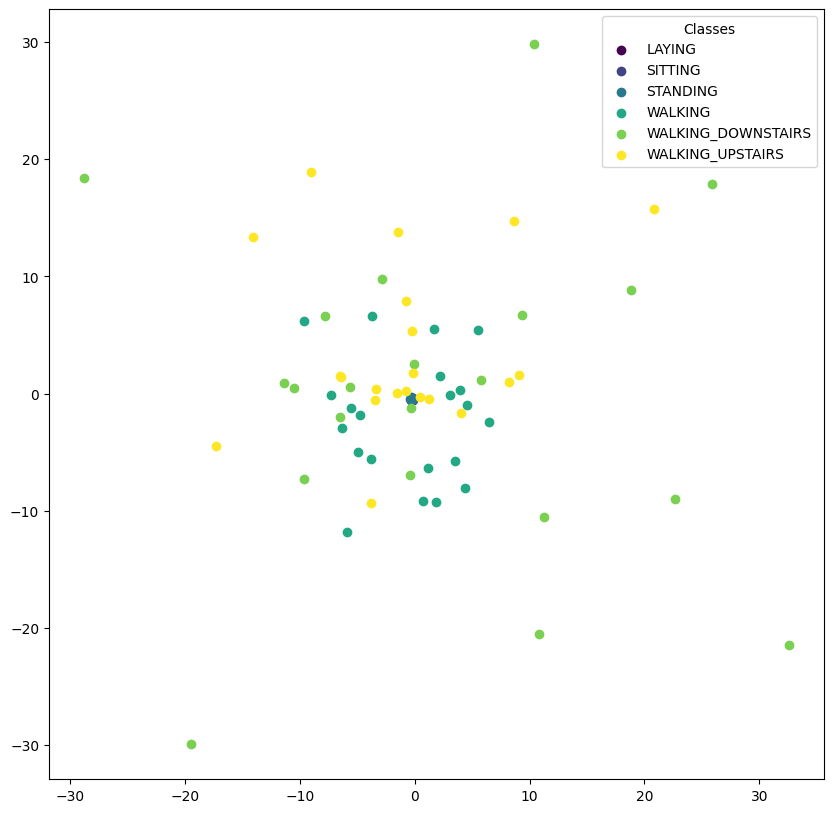

In [62]:
le = LabelEncoder()
labels = le.fit_transform(master_dataset['activity'])
unique_labels = np.unique(labels)
cmap = plt.get_cmap('viridis', len(unique_labels))
plt.figure(figsize=(10, 10))
for i, label in enumerate(unique_labels):
    plt.scatter(reduced_data[:, 0][labels==label], reduced_data[:, 1][labels==label], color=cmap(i), label=le.inverse_transform([label])[0])

plt.legend(title='Classes')
plt.show()